C:\Users\Shivam Singh\OneDrive\Desktop\ML\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


585/585 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step


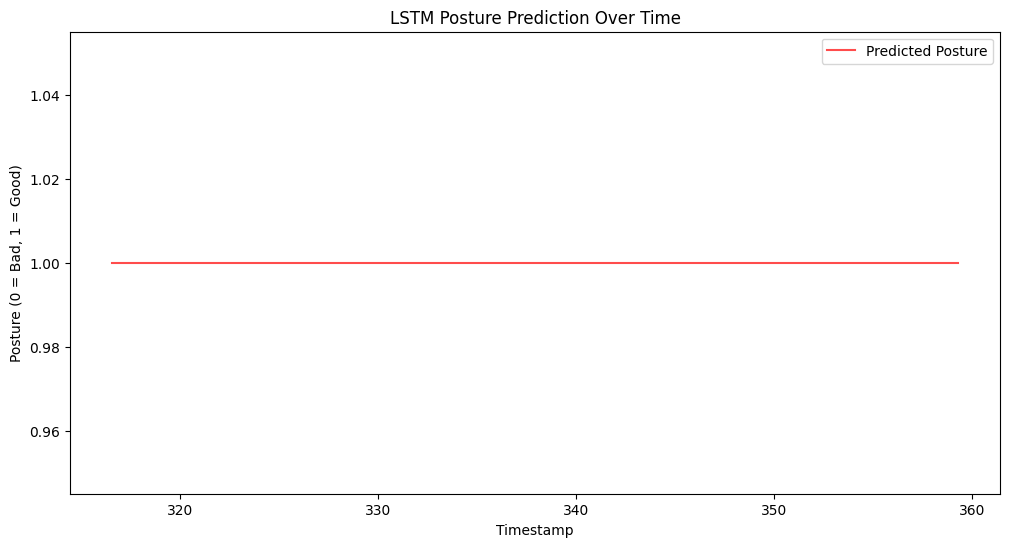

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Define sequence length for LSTM input
sequence_length = 50  # 50 time steps per sequence

# Load trained model
model = load_model("lstm_posture_model.h5")

# Load new gyroscope data (replace 'new_gyro_data.csv' with actual file)
import pandas as pd
new_df = pd.read_csv("new_gyro_data.csv")

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(new_df[["angle_x", "angle_y", "angle_z"]])  # Fit on the original training dataset
new_df[["angle_x", "angle_y", "angle_z"]] = scaler.transform(new_df[["angle_x", "angle_y", "angle_z"]])

# Normalize new data (use same scaler as before)
new_df[["angle_x", "angle_y", "angle_z"]] = scaler.transform(new_df[["angle_x", "angle_y", "angle_z"]])

# Create sequences for LSTM input
new_features = new_df[["angle_x", "angle_y", "angle_z"]].values
new_generator = TimeseriesGenerator(new_features, np.zeros(len(new_features)), length=sequence_length, batch_size=1)

# Predict posture
predictions = model.predict(new_generator)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels

# Plot predictions over time
plt.figure(figsize=(12, 6))
plt.plot(new_df["timestamp"][sequence_length:], predictions, label="Predicted Posture", color='red', alpha=0.7)
plt.xlabel("Timestamp")
plt.ylabel("Posture (0 = Bad, 1 = Good)")
plt.title("LSTM Posture Prediction Over Time")
plt.legend()
plt.show()
